In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
##3 Quisiera saber cual es la expresion de la suma de una matriz simetrica con valores dados por una uniforme fuera de la diagonal y unos en la diagonal.
result = []

Q = 3
lspace = np.round(np.arange(0, 3.2, .15), 3)

for s1 in lspace:
    for s2 in lspace:
        for s3 in [0, 1]:
            s = np.array([s1, s2, s3])

            M = 500

            for m in range(M):
                A = np.random.uniform(-1, 1, (Q, Q))
                np.fill_diagonal(A, 0) # Fill it with zeros cause I just take these terms out. 
                i_lower = np.tril_indices(Q, -1)
                A[i_lower] = A.T[i_lower] # lower takes values of upper

                result += [[s1, s2, s3, m, np.multiply(np.outer(s, s), A).sum()/2.]]

            # La expectativa es siempre cero. El tema es como varia el sigma del resultado segun los sigma que pongo.
df = pd.DataFrame(result, columns = ['s1', 's2', 's3', 'm', 'y'])

In [175]:
df.loc[df.s3 == 1].groupby(['s1', 's2'])['y'].var().unstack().round(2).tail()

s2,0.0,0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.2,1.35,...,1.8,1.95,2.1,2.25,2.4,2.55,2.7,2.85,3.0,3.15
s1,,,,,,,,,,,,,,,,,,,,,
2.55,2.10,2.20,2.38,2.69,3.00,3.62,3.80,4.55,5.69,6.95,...,9.94,11.88,11.42,14.34,17.50,18.77,21.29,24.61,26.23,28.46
2.70,2.39,2.39,2.95,3.14,3.46,4.27,4.80,5.57,6.00,7.61,...,9.96,12.79,15.24,16.21,19.19,19.94,22.18,24.89,24.90,31.10
2.85,2.59,2.85,2.91,3.04,3.70,3.97,4.81,5.89,6.77,9.17,...,13.36,14.34,15.86,18.48,20.36,22.37,25.02,26.33,28.66,32.85
3.00,2.88,3.17,3.32,3.98,4.42,4.74,5.28,6.90,7.89,9.13,...,14.58,16.29,15.46,19.25,22.94,24.83,24.78,29.00,35.71,35.03
3.15,3.48,3.52,3.55,4.23,5.03,5.44,5.97,7.28,8.59,9.67,...,15.86,17.29,17.71,22.09,22.57,24.70,27.97,32.59,35.81,38.27


In [176]:
df['y2'] = df['y']**2
meany2 = df.loc[df.s3 == 1].groupby(['s1', 's2'])['y2'].mean().unstack()
meany2.round(2).tail()

s2,0.0,0.15,0.3,0.45,0.6,0.75,0.9,1.05,1.2,1.35,...,1.8,1.95,2.1,2.25,2.4,2.55,2.7,2.85,3.0,3.15
s1,,,,,,,,,,,,,,,,,,,,,
2.55,2.11,2.20,2.38,2.69,3.00,3.64,3.80,4.55,5.70,6.94,...,9.92,11.88,11.52,14.31,17.47,18.78,21.26,24.56,26.29,28.43
2.70,2.38,2.39,2.95,3.14,3.45,4.27,4.79,5.56,6.00,7.60,...,9.94,12.77,15.21,16.31,19.20,19.98,22.18,24.84,25.09,31.07
2.85,2.59,2.85,2.91,3.04,3.72,3.98,4.81,5.92,6.77,9.16,...,13.38,14.37,15.87,18.44,20.32,22.33,24.98,26.28,28.64,32.81
3.00,2.87,3.17,3.40,3.99,4.44,4.73,5.28,6.90,7.88,9.17,...,14.57,16.30,15.49,19.26,22.89,24.84,24.75,28.94,35.66,34.96
3.15,3.48,3.52,3.54,4.22,5.04,5.44,5.96,7.27,8.57,9.67,...,15.85,17.29,17.68,22.15,22.53,24.81,27.93,32.58,35.74,38.22


In [177]:
# outer2 = pd.DataFrame(np.outer(lspace, lspace)**2, columns = lspace, index = lspace)
# outer2.round(2)

In [178]:
s12 = np.outer(lspace**2, np.ones(len(lspace)))
s22 = s12.T
s122 = np.outer(lspace, lspace)**2
outer2_comb = pd.DataFrame(s122 + s12 + s22, columns = lspace, index = lspace)


In [179]:
(meany2/outer2_comb).stack().describe()

count    483.000000
mean       0.333332
std        0.017356
min        0.290027
25%        0.321712
50%        0.332782
75%        0.344771
max        0.390803
dtype: float64

In [156]:
(meany2/outer2).stack().describe()

count    441.000000
mean       1.335404
std        0.052447
min        1.178651
25%        1.298760
50%        1.334072
75%        1.368525
max        1.492383
dtype: float64

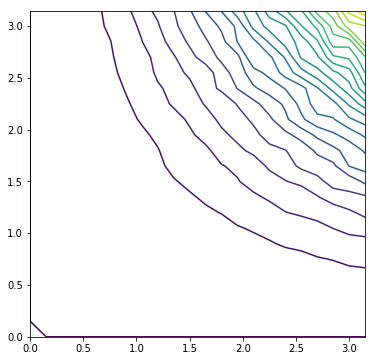

In [96]:
fig, ax = plt.subplots(1, figsize = (6, 6))

X, Y = np.meshgrid(meany2.columns, meany2.index)

plt.contour(X, Y, meany2.values, 25)

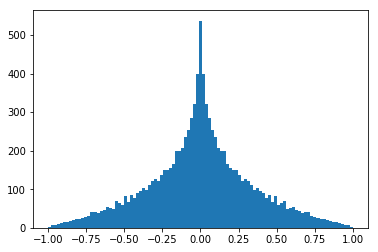

In [47]:
grid = np.linspace(-1, 1, 101)
U2 = np.outer(grid, grid)
plt.hist(U2.flatten(), 101)
plt.show()


In [69]:
U2.flatten().std()

0.34

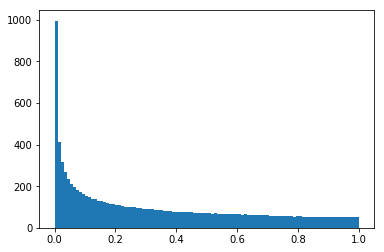

In [122]:
grid = np.linspace(-1, 1, 10001)

plt.hist(grid**2, 101)
plt.show()

In [125]:
np.mean(grid**2)

0.33340000000000003